**YOUR NAMES HERE**

Spring 2025

CS 444: Deep Learning

Project 1: Deep Neural Networks 

#### Week 1: VGG4 and building a deep learning library

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 18})

np.set_printoptions(suppress=True, precision=4)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

2025-02-18 01:37:51.156314: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-18 01:37:58.008499: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Task 4. Train `VGG4` on MNIST and CIFAR-10

Woohoo! VGG4 is built and tested! Time for some fun! 😎

To train in a reasonable amount of time, upload your project code to CoCalc so that you can train on the GPU. See [instructions on the class website ](https://cs.colby.edu/courses/S25/cs444/software.html#cocalc) for getting this setup.

*As noted on the website, if you have a higher-end Macbook with a Pro or Max chip and ≥ 16 GB of memory, you could probably run this workload on your computer if you would prefer. This is entirely optional and the cloud will almost certainly be faster than even the fastest Mac. Setting this up would just provide some extra convenience/flexibility. See the [macOS instructions](https://cs.colby.edu/courses/S25/cs444/software.html#tfmac) for setup.*

Run the cell below to make sure TensorFlow is running on the GPU.

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    print('Running on the GPU')
else:
    print('NOT running on the GPU')

Running on the GPU


In [3]:
from datasets import get_dataset
from vgg_nets import VGG4

### 4a. Train `VGG4` on MNIST on the GPU

This will be a "hello world" test to make sure your `fit` method is working.

Write code in the cell below to load in MNIST

In [11]:
x_train, y_train, x_val, y_val, x_test, y_test, classnames = get_dataset('mnist', val_prop=0.1)
# KEEP ME
print(f'Your training set data have shape {x_train.shape} and they should be (54000, 28, 28, 1)')
print(f'Your training set labels have shape {y_train.shape} and they should be (54000,)')
print(f'Your val set data have shape {x_val.shape} and they should be (6000, 28, 28, 1)')
print(f'Your val set labels have shape {y_val.shape} and they should be (6000,)')
print(f'Your test set data have shape {x_test.shape} and they should be (10000, 28, 28, 1)')
print(f'Your test set labels have shape {y_test.shape} and they should be (10000,)')

Your training set data have shape (54000, 28, 28, 1) and they should be (54000, 28, 28, 1)
Your training set labels have shape (54000,) and they should be (54000,)
Your val set data have shape (6000, 28, 28, 1) and they should be (6000, 28, 28, 1)
Your val set labels have shape (6000,) and they should be (6000,)
Your test set data have shape (10000, 28, 28, 1) and they should be (10000, 28, 28, 1)
Your test set labels have shape (10000,) and they should be (10000,)


Train `VGG4` in the cell below on MNIST for `7` epochs and a batch size of `1024`! Print out your accuracy on the test set when training is done.

The **entire** process of training and evaluating test accuracy should take no more than 1 min (*at most!*). If it is taking longer, seek help.

Your print outs should look something like:

```
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flat) shape: [1, 12544]
MaxPool2D layer output(maxpool1) shape: [1, 14, 14, 64]
Conv2D layer output(conv2) shape: [1, 28, 28, 64]
Conv2D layer output(conv1) shape: [1, 28, 28, 64]
---------------------------------------------------------------------------
Epoch 0/6, Training loss 1.54, Val loss 0.33, Val acc 89.94 
Epoch 0 took: blah0 secs
Epoch 1/6, Training loss 0.42, Val loss 0.17, Val acc 94.59 
Epoch 1 took: blah1 secs
...
Epoch 6/6, Training loss surprise, Val loss surprise, Val acc surprise
Epoch 6 took: blah6 secs
Finished training after 7 epochs!
VGG4 MNIST Test accuracy: surprise%
```

The val and test accuracy should be satisfyingly high — in the high 90s.

In [13]:
# KEEP THIS SEED
tf.random.set_seed(0)

from vgg_nets import VGG4

vgg4 = VGG4(C=10, input_feats_shape=(28, 28, 1))
vgg4.compile()

train_loss_hist, val_loss_hist, val_acc_hist, e = vgg4.fit(x_train, y_train, x_val, y_val, batch_size = 1024, max_epochs=7)
print("\nEvaluating on test set...")
test_acc = vgg4.evaluate(x_test, y_test, 1024)
print(f"Final test accuracy: {test_acc[0]:.4f}")

---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
Dropout layer output(dropout_layer_3) shape: [1, 128]
Dense layer output(dense_layer_3) shape: [1, 128]
Flatten layer output(flatten_layer_2) shape: [1, 12544]
MaxPool2D layer output(max_pool_layer_1) shape: [1, 14, 14, 64]
Conv2D layer output(conv_layer_2) shape: [1, 28, 28, 64]
Conv2D layer output(conv_layer_1) shape: [1, 28, 28, 64]
---------------------------------------------------------------------------


Epoch 1/7: Train Loss: 1.5952, Val Loss: 0.3384, Val Acc: 0.9031, Time: 4.21s


Epoch 2/7: Train Loss: 0.4189, Val Loss: 0.1657, Val Acc: 0.9490, Time: 2.18s


Epoch 3/7: Train Loss: 0.3105, Val Loss: 0.1254, Val Acc: 0.9650, Time: 2.18s


Epoch 4/7: Train Loss: 0.2554, Val Loss: 0.0890, Val Acc: 0.9727, Time: 2.18s


Epoch 5/7: Train Loss: 0.2035, Val Loss: 0.0716, Val Acc: 0.9750, Time: 2.18s


Epoch 6/7: Train Loss: 0.1642, Val Loss: 0.0636, Val Acc: 0.9791, Time: 2.18s


Epoch 7/7: Train Loss: 0.1424, Val Loss: 0.0555, Val Acc: 0.9814, Time: 2.18s
Finished training after 7 epochs!

Evaluating on test set...
Final test accuracy: 0.9752


### 4b. Train `VGG4` on MNIST on the CPU

To appreciate the advantage for training deep networks on GPUs instead of your computer's CPU, copy-paste your code above that trains your VGG4 net on MNIST below. Instead of running it on CoCalc, run it locally on your computer. Be sure to print out the time per epoch.

*If the net takes >2 minutes per epoch on your computer, just train for one epoch then call it quits :)*

### 4c. Questions

**Question 1:** Approximately how long did it take for 1 epoch of training with and without the GPU. Compute the relative compute time (`gpu_time_per_epoch`/`cpu_time_per_epoch`). What do you think?

**Answer 1:**

### 4d. Train `VGG4` on CIFAR-10

Now let's train on CIFAR-10. Run this (*and all subsequent large training sessions*) on CoCalc/the GPU 😊

Write code in the cell below to load in CIFAR-10.

In [17]:
x_train, y_train, x_val, y_val, x_test, y_test, classnames = get_dataset('cifar10', val_prop=0.1)
# KEEP ME
print(f'Your training set data have shape {x_train.shape} and they should be (45000, 32, 32, 3)')
print(f'Your training set labels have shape {y_train.shape} and they should be (45000,)')
print(f'Your val set data have shape {x_val.shape} and they should be (5000, 32, 32, 3)')
print(f'Your val set labels have shape {y_val.shape} and they should be (5000,)')
print(f'Your test set data have shape {x_test.shape} and they should be (10000, 32, 32, 3)')
print(f'Your test set labels have shape {y_test.shape} and they should be (10000,)')

Your training set data have shape (45000, 32, 32, 3) and they should be (45000, 32, 32, 3)
Your training set labels have shape (45000,) and they should be (45000,)
Your val set data have shape (5000, 32, 32, 3) and they should be (5000, 32, 32, 3)
Your val set labels have shape (5000,) and they should be (5000,)
Your test set data have shape (10000, 32, 32, 3) and they should be (10000, 32, 32, 3)
Your test set labels have shape (10000,) and they should be (10000,)


Train `VGG4` on CIFAR-10 in the cell below for `15` epochs and use a batch size of `128`.

*You should anticipate 10-20 secs per epoch of training. Thus, the whole training session should take ~2.5-5 mins. If this is far off, please seek help.*

Plot the training and val loss over epochs. Put test acc in the title. *If everything is working, your training and validation loss should steadily decrease then start to plateau by the end of training.*

In [18]:
# KEEP THIS SEED
tf.random.set_seed(0)

vgg4 = VGG4(C=10, input_feats_shape=x_train.shape[1:])
vgg4.compile()

train_loss_hist, val_loss_hist, val_acc_hist, e = vgg4.fit(x_train, y_train, x_val, y_val, batch_size = 128, max_epochs=15)

print("\nEvaluating on test set...")
test_acc = vgg4.evaluate(x_test, y_test, 128)
print(f"Final test accuracy: {test_acc[0]:.4f}")

---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
Dropout layer output(dropout_layer_3) shape: [1, 128]
Dense layer output(dense_layer_3) shape: [1, 128]
Flatten layer output(flatten_layer_2) shape: [1, 16384]
MaxPool2D layer output(max_pool_layer_1) shape: [1, 16, 16, 64]
Conv2D layer output(conv_layer_2) shape: [1, 32, 32, 64]
Conv2D layer output(conv_layer_1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


Epoch 1/15: Train Loss: 1.8677, Val Loss: 1.5623, Val Acc: 0.4285, Time: 4.18s


Epoch 2/15: Train Loss: 1.5414, Val Loss: 1.3927, Val Acc: 0.5010, Time: 2.38s


Epoch 3/15: Train Loss: 1.4064, Val Loss: 1.2719, Val Acc: 0.5417, Time: 2.38s


Epoch 4/15: Train Loss: 1.3024, Val Loss: 1.1707, Val Acc: 0.5879, Time: 2.38s


Epoch 5/15: Train Loss: 1.2139, Val Loss: 1.1319, Val Acc: 0.6062, Time: 2.39s


Epoch 6/15: Train Loss: 1.1595, Val Loss: 1.0811, Val Acc: 0.6212, Time: 2.40s


Epoch 7/15: Train Loss: 1.1152, Val Loss: 1.0665, Val Acc: 0.6254, Time: 2.39s


Epoch 8/15: Train Loss: 1.0588, Val Loss: 1.0395, Val Acc: 0.6410, Time: 2.40s


Epoch 9/15: Train Loss: 1.0197, Val Loss: 1.0166, Val Acc: 0.6412, Time: 2.40s


Epoch 10/15: Train Loss: 0.9975, Val Loss: 1.0091, Val Acc: 0.6488, Time: 2.40s


Epoch 11/15: Train Loss: 0.9730, Val Loss: 1.0111, Val Acc: 0.6492, Time: 2.40s


Epoch 12/15: Train Loss: 0.9443, Val Loss: 0.9974, Val Acc: 0.6514, Time: 2.40s


Epoch 13/15: Train Loss: 0.9115, Val Loss: 0.9962, Val Acc: 0.6544, Time: 2.40s


Epoch 14/15: Train Loss: 0.8931, Val Loss: 0.9828, Val Acc: 0.6619, Time: 2.41s


Epoch 15/15: Train Loss: 0.8768, Val Loss: 0.9964, Val Acc: 0.6611, Time: 2.43s
Finished training after 15 epochs!

Evaluating on test set...


Final test accuracy: 0.6454


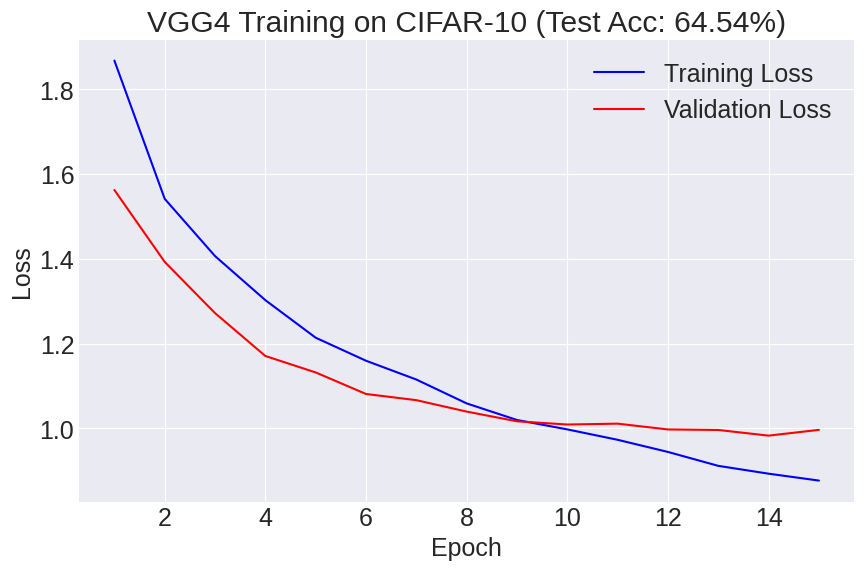

In [19]:
import matplotlib.pyplot as plt

# plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss_hist) + 1), train_loss_hist, 'b-', label='Training Loss')
plt.plot(range(1, len(val_loss_hist) + 1), val_loss_hist, 'r-', label='Validation Loss')

# add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'VGG4 Training on CIFAR-10 (Test Acc: {test_acc[0]*100:.2f}%)')
plt.legend()
plt.grid(True)

# show plot
plt.show()

### 4e. Experiment: Effect of batch size on runtime and accuracy

To develop your intuition about how the choice of batch size generally affects runtime and accuracy on a dataset like CIFAR-10, run an experiment in which fresh `VGG4` nets are trained for `15` epochs with one of the following batch sizes:<br/>
`[128, 256, 512, 1024, 2048]`. After each training run, record the test accuracy and runtime.

Create two plots:
1. The test accuracy (y axis) as a function of the batch size (x axis). There should be 5 markers joined by a single curve.
2. The runtime (y axis) as a function of the batch size (x axis). There should be 5 markers joined by a single curve.

**Note:**
- Your `fit` method prints the runtime per epoch, but in this task you should record the total runtime over training and prediction. (in seconds). To do this, it may make sense to use the time module to record the total time in the notebook cell below.
- You should be running this on the GPU!

In [20]:
import time


Testing batch size: 128
--------------------------------------------------
---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
Dropout layer output(dropout_layer_3) shape: [1, 128]
Dense layer output(dense_layer_3) shape: [1, 128]
Flatten layer output(flatten_layer_2) shape: [1, 16384]
MaxPool2D layer output(max_pool_layer_1) shape: [1, 16, 16, 64]
Conv2D layer output(conv_layer_2) shape: [1, 32, 32, 64]
Conv2D layer output(conv_layer_1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


Epoch 1/15: Train Loss: 1.8677, Val Loss: 1.5623, Val Acc: 0.4285, Time: 4.20s


Epoch 2/15: Train Loss: 1.5414, Val Loss: 1.3927, Val Acc: 0.5010, Time: 2.40s


Epoch 3/15: Train Loss: 1.4064, Val Loss: 1.2719, Val Acc: 0.5417, Time: 2.39s


Epoch 4/15: Train Loss: 1.3024, Val Loss: 1.1707, Val Acc: 0.5879, Time: 2.39s


Epoch 5/15: Train Loss: 1.2139, Val Loss: 1.1319, Val Acc: 0.6062, Time: 2.40s


Epoch 6/15: Train Loss: 1.1595, Val Loss: 1.0811, Val Acc: 0.6212, Time: 2.41s


Epoch 7/15: Train Loss: 1.1152, Val Loss: 1.0665, Val Acc: 0.6254, Time: 2.43s


Epoch 8/15: Train Loss: 1.0588, Val Loss: 1.0395, Val Acc: 0.6410, Time: 2.42s


Epoch 9/15: Train Loss: 1.0197, Val Loss: 1.0166, Val Acc: 0.6412, Time: 2.40s


Epoch 10/15: Train Loss: 0.9975, Val Loss: 1.0091, Val Acc: 0.6488, Time: 2.40s


Epoch 11/15: Train Loss: 0.9730, Val Loss: 1.0111, Val Acc: 0.6492, Time: 2.40s


Epoch 12/15: Train Loss: 0.9443, Val Loss: 0.9974, Val Acc: 0.6514, Time: 2.40s


Epoch 13/15: Train Loss: 0.9115, Val Loss: 0.9962, Val Acc: 0.6544, Time: 2.42s


Epoch 14/15: Train Loss: 0.8931, Val Loss: 0.9828, Val Acc: 0.6619, Time: 2.41s


Epoch 15/15: Train Loss: 0.8768, Val Loss: 0.9964, Val Acc: 0.6611, Time: 2.41s
Finished training after 15 epochs!


Batch Size: 128
Training Time: 37.88 seconds
Final test accuracy: 0.6454

Testing batch size: 256
--------------------------------------------------
---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
Dropout layer output(dropout_layer_3) shape: [1, 128]
Dense layer output(dense_layer_3) shape: [1, 128]
Flatten layer output(flatten_layer_2) shape: [1, 16384]
MaxPool2D layer output(max_pool_layer_1) shape: [1, 16, 16, 64]
Conv2D layer output(conv_layer_2) shape: [1, 32, 32, 64]
Conv2D layer output(conv_layer_1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


Epoch 1/15: Train Loss: 1.9534, Val Loss: 1.6627, Val Acc: 0.3954, Time: 4.62s


Epoch 2/15: Train Loss: 1.6605, Val Loss: 1.5161, Val Acc: 0.4630, Time: 2.50s


Epoch 3/15: Train Loss: 1.5145, Val Loss: 1.3619, Val Acc: 0.5204, Time: 2.48s


Epoch 4/15: Train Loss: 1.3939, Val Loss: 1.2538, Val Acc: 0.5489, Time: 2.49s


Epoch 5/15: Train Loss: 1.3005, Val Loss: 1.1816, Val Acc: 0.5814, Time: 2.48s


Epoch 6/15: Train Loss: 1.2394, Val Loss: 1.1555, Val Acc: 0.5898, Time: 2.48s


Epoch 7/15: Train Loss: 1.1722, Val Loss: 1.0970, Val Acc: 0.6059, Time: 2.48s


Epoch 8/15: Train Loss: 1.1132, Val Loss: 1.0625, Val Acc: 0.6277, Time: 2.47s


Epoch 9/15: Train Loss: 1.0497, Val Loss: 1.0417, Val Acc: 0.6303, Time: 2.48s


Epoch 10/15: Train Loss: 1.0151, Val Loss: 1.0200, Val Acc: 0.6447, Time: 2.49s


Epoch 11/15: Train Loss: 0.9682, Val Loss: 1.0125, Val Acc: 0.6447, Time: 2.48s


Epoch 12/15: Train Loss: 0.9341, Val Loss: 0.9743, Val Acc: 0.6581, Time: 2.47s


Epoch 13/15: Train Loss: 0.8843, Val Loss: 0.9722, Val Acc: 0.6643, Time: 2.47s


Epoch 14/15: Train Loss: 0.8388, Val Loss: 0.9605, Val Acc: 0.6676, Time: 2.47s


Epoch 15/15: Train Loss: 0.8148, Val Loss: 0.9579, Val Acc: 0.6737, Time: 2.48s
Finished training after 15 epochs!


Batch Size: 256
Training Time: 39.32 seconds
Final test accuracy: 0.6561

Testing batch size: 512
--------------------------------------------------
---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
Dropout layer output(dropout_layer_3) shape: [1, 128]
Dense layer output(dense_layer_3) shape: [1, 128]
Flatten layer output(flatten_layer_2) shape: [1, 16384]
MaxPool2D layer output(max_pool_layer_1) shape: [1, 16, 16, 64]
Conv2D layer output(conv_layer_2) shape: [1, 32, 32, 64]
Conv2D layer output(conv_layer_1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


Epoch 1/15: Train Loss: 2.0439, Val Loss: 1.7687, Val Acc: 0.3750, Time: 4.07s


Epoch 2/15: Train Loss: 1.7300, Val Loss: 1.5759, Val Acc: 0.4266, Time: 2.34s


Epoch 3/15: Train Loss: 1.5497, Val Loss: 1.4149, Val Acc: 0.4920, Time: 2.33s


Epoch 4/15: Train Loss: 1.4465, Val Loss: 1.3214, Val Acc: 0.5234, Time: 2.34s


Epoch 5/15: Train Loss: 1.3517, Val Loss: 1.2363, Val Acc: 0.5590, Time: 2.34s


Epoch 6/15: Train Loss: 1.2935, Val Loss: 1.2035, Val Acc: 0.5616, Time: 2.34s


Epoch 7/15: Train Loss: 1.2416, Val Loss: 1.1747, Val Acc: 0.5760, Time: 2.35s


Epoch 8/15: Train Loss: 1.1822, Val Loss: 1.1176, Val Acc: 0.6005, Time: 2.34s


Epoch 9/15: Train Loss: 1.1314, Val Loss: 1.0892, Val Acc: 0.6057, Time: 2.33s


Epoch 10/15: Train Loss: 1.0883, Val Loss: 1.0613, Val Acc: 0.6233, Time: 2.34s


Epoch 11/15: Train Loss: 1.0425, Val Loss: 1.0369, Val Acc: 0.6315, Time: 2.34s


Epoch 12/15: Train Loss: 1.0066, Val Loss: 1.0104, Val Acc: 0.6376, Time: 2.35s


Epoch 13/15: Train Loss: 0.9529, Val Loss: 0.9922, Val Acc: 0.6504, Time: 2.35s


Epoch 14/15: Train Loss: 0.9103, Val Loss: 0.9738, Val Acc: 0.6612, Time: 2.35s


Epoch 15/15: Train Loss: 0.8793, Val Loss: 0.9506, Val Acc: 0.6586, Time: 2.34s
Finished training after 15 epochs!
Batch Size: 512
Training Time: 36.86 seconds
Final test accuracy: 0.6562

Testing batch size: 1024
--------------------------------------------------


---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
Dropout layer output(dropout_layer_3) shape: [1, 128]
Dense layer output(dense_layer_3) shape: [1, 128]
Flatten layer output(flatten_layer_2) shape: [1, 16384]
MaxPool2D layer output(max_pool_layer_1) shape: [1, 16, 16, 64]
Conv2D layer output(conv_layer_2) shape: [1, 32, 32, 64]
Conv2D layer output(conv_layer_1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


Epoch 1/15: Train Loss: 2.1502, Val Loss: 1.9386, Val Acc: 0.2974, Time: 4.01s


Epoch 2/15: Train Loss: 1.8570, Val Loss: 1.7046, Val Acc: 0.3928, Time: 2.29s


Epoch 3/15: Train Loss: 1.7058, Val Loss: 1.6028, Val Acc: 0.4180, Time: 2.30s


Epoch 4/15: Train Loss: 1.6357, Val Loss: 1.5228, Val Acc: 0.4590, Time: 2.30s


Epoch 5/15: Train Loss: 1.5604, Val Loss: 1.4473, Val Acc: 0.4885, Time: 2.30s


Epoch 6/15: Train Loss: 1.4906, Val Loss: 1.3836, Val Acc: 0.5024, Time: 2.29s


Epoch 7/15: Train Loss: 1.4140, Val Loss: 1.2942, Val Acc: 0.5305, Time: 2.30s


Epoch 8/15: Train Loss: 1.3303, Val Loss: 1.2354, Val Acc: 0.5547, Time: 2.31s


Epoch 9/15: Train Loss: 1.2682, Val Loss: 1.1879, Val Acc: 0.5828, Time: 2.32s


Epoch 10/15: Train Loss: 1.2169, Val Loss: 1.1247, Val Acc: 0.6062, Time: 2.31s


Epoch 11/15: Train Loss: 1.1702, Val Loss: 1.1156, Val Acc: 0.6038, Time: 2.31s


Epoch 12/15: Train Loss: 1.1364, Val Loss: 1.0839, Val Acc: 0.6135, Time: 2.31s


Epoch 13/15: Train Loss: 1.0932, Val Loss: 1.0503, Val Acc: 0.6267, Time: 2.31s


Epoch 14/15: Train Loss: 1.0522, Val Loss: 1.0369, Val Acc: 0.6299, Time: 2.30s


Epoch 15/15: Train Loss: 1.0193, Val Loss: 1.0080, Val Acc: 0.6372, Time: 2.31s
Finished training after 15 epochs!
Batch Size: 1024
Training Time: 36.26 seconds
Final test accuracy: 0.6330

Testing batch size: 2048
--------------------------------------------------
---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
Dropout layer output(dropout_layer_3) shape: [1, 128]
Dense layer output(dense_layer_3) shape: [1, 128]
Flatten layer output(flatten_layer_2) shape: [1, 16384]
MaxPool2D layer output(max_pool_layer_1) shape: [1, 16, 16, 64]
Conv2D layer output(conv_layer_2) shape: [1, 32, 32, 64]
Conv2D layer output(conv_layer_1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


Epoch 1/15: Train Loss: 2.2613, Val Loss: 2.0993, Val Acc: 0.2310, Time: 4.02s


Epoch 2/15: Train Loss: 1.9981, Val Loss: 1.8773, Val Acc: 0.3215, Time: 2.26s


Epoch 3/15: Train Loss: 1.8186, Val Loss: 1.7271, Val Acc: 0.3926, Time: 2.26s


Epoch 4/15: Train Loss: 1.7364, Val Loss: 1.6445, Val Acc: 0.4087, Time: 2.26s


Epoch 5/15: Train Loss: 1.6738, Val Loss: 1.5909, Val Acc: 0.4302, Time: 2.26s


Epoch 6/15: Train Loss: 1.6303, Val Loss: 1.5449, Val Acc: 0.4561, Time: 2.26s


Epoch 7/15: Train Loss: 1.5662, Val Loss: 1.4650, Val Acc: 0.4780, Time: 2.26s


Epoch 8/15: Train Loss: 1.5107, Val Loss: 1.4182, Val Acc: 0.4919, Time: 2.28s


Epoch 9/15: Train Loss: 1.4572, Val Loss: 1.3826, Val Acc: 0.5015, Time: 2.28s


Epoch 10/15: Train Loss: 1.4119, Val Loss: 1.3371, Val Acc: 0.5190, Time: 2.26s


Epoch 11/15: Train Loss: 1.3728, Val Loss: 1.3239, Val Acc: 0.5227, Time: 2.26s


Epoch 12/15: Train Loss: 1.3509, Val Loss: 1.2635, Val Acc: 0.5586, Time: 2.26s


Epoch 13/15: Train Loss: 1.3018, Val Loss: 1.2355, Val Acc: 0.5603, Time: 2.26s


Epoch 14/15: Train Loss: 1.2680, Val Loss: 1.1988, Val Acc: 0.5740, Time: 2.26s


Epoch 15/15: Train Loss: 1.2345, Val Loss: 1.1762, Val Acc: 0.5825, Time: 2.28s
Finished training after 15 epochs!
Batch Size: 2048
Training Time: 35.70 seconds
Final test accuracy: 0.5881


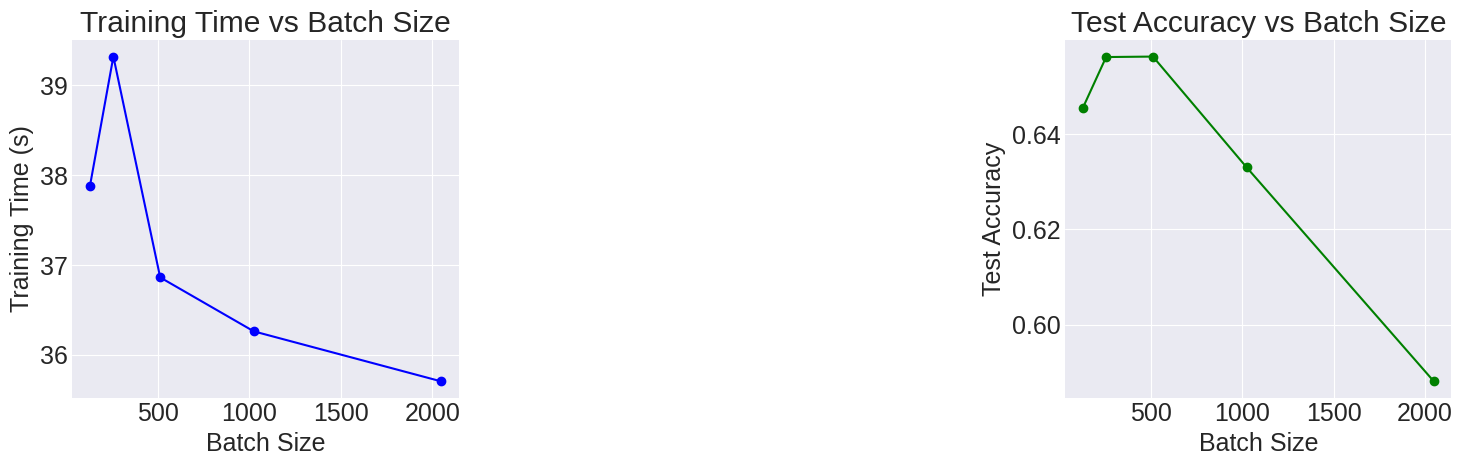


Numerical Results:
Batch Size: 128
Training Time: 37.88s
Test Accuracy: 0.6454

Batch Size: 256
Training Time: 39.32s
Test Accuracy: 0.6561

Batch Size: 512
Training Time: 36.86s
Test Accuracy: 0.6562

Batch Size: 1024
Training Time: 36.26s
Test Accuracy: 0.6330

Batch Size: 2048
Training Time: 35.70s
Test Accuracy: 0.5881



In [23]:
import time
import numpy as np
import matplotlib.pyplot as plt

# KEEP THIS SEED
tf.random.set_seed(0)

batch_sizes = [128, 256, 512, 1024, 2048]
results = {
    'batch_sizes': batch_sizes,
    'train_times': [],
    'eval_times': [],
    'accuracies': []
}

for batch_size in batch_sizes:
    print(f"\nTesting batch size: {batch_size}")
    print("-" * 50)
    
    # Initialize model
    vgg4 = VGG4(C=10, input_feats_shape=x_train.shape[1:])
    vgg4.compile()
    
    # Training time
    start_time = time.time()
    train_loss_hist, val_loss_hist, val_acc_hist, e = vgg4.fit(
        x_train, y_train, x_val, y_val, 
        batch_size=batch_size,
        max_epochs=15
    )
    train_time = time.time() - start_time
    results['train_times'].append(train_time)
    
    # Evaluation time and accuracy
    start_time = time.time()
    test_acc = vgg4.evaluate(x_test, y_test, batch_size)
    eval_time = time.time() - start_time
    results['accuracies'].append(test_acc[0])
    
    print(f"Batch Size: {batch_size}")
    print(f"Training Time: {train_time:.2f} seconds")
    print(f"Final test accuracy: {test_acc[0]:.4f}")

# Create plots
plt.figure(figsize=(15, 5))

# Training Time vs Batch Size
plt.subplot(1, 3, 1)
plt.plot(results['batch_sizes'], results['train_times'], 'b-o')
plt.xlabel('Batch Size')
plt.ylabel('Training Time (s)')
plt.title('Training Time vs Batch Size')

# Accuracy vs Batch Size
plt.subplot(1, 3, 3)
plt.plot(results['batch_sizes'], results['accuracies'], 'g-o')
plt.xlabel('Batch Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Batch Size')

plt.tight_layout()
plt.show()

# Print numerical results for reference
print("\nNumerical Results:")
for i, batch_size in enumerate(results['batch_sizes']):
    print(f"Batch Size: {batch_size}")
    print(f"Training Time: {results['train_times'][i]:.2f}s")
    print(f"Test Accuracy: {results['accuracies'][i]:.4f}\n")

### 4f. Questions

**Question 2:** What do the plots suggest to you about the relationship between batch size and accuracy? Please be specific,citing evidence from your plots.

**Question 3:** Do you find this relationship surprising? Why or why not?

**Answer 2:** 

The plots seem to suggest that a smaller batch size leads to higher accuracy, while larger batch sizes lead to lower accuracy. The top two accuracy scores were from batch sizes of 256 and 512, then the accuracy would decrease each time the batch size increased.

**Answer 3:** 

I do not find this relationship surprising as smaller batch sizes mean the model must update its weights more frequently, while with larger batch sizes the model updates less frequently per epoch.